## SRGAN stands for Super Resolution Generative Adversarial Networks.

These networks, take in low resolution image and output a high resolution photo-realistic image, using a generative adversarial network.

Earlier models, which were used for increasing the resolution of images, focused on reducing the MSE, that is taking the mean squared error between the ground truth image and generated image, and minimising this pixel by pixel mean squared error between the two images. However SRGAN, replaces this MSE with Perceptual loss.

Perceptual Loss is a combination of both Adversarial Loss (Discriminator Loss) and Content Loss (Generator Loss).
It evaluates the image quality based on its perceptual quality, this is preferred over MSE because this retains the structural information of the ground truth image, instead of trying to minimise the pixel by pixel MSE.


## Why focus on Perceptual Loss over MSE?

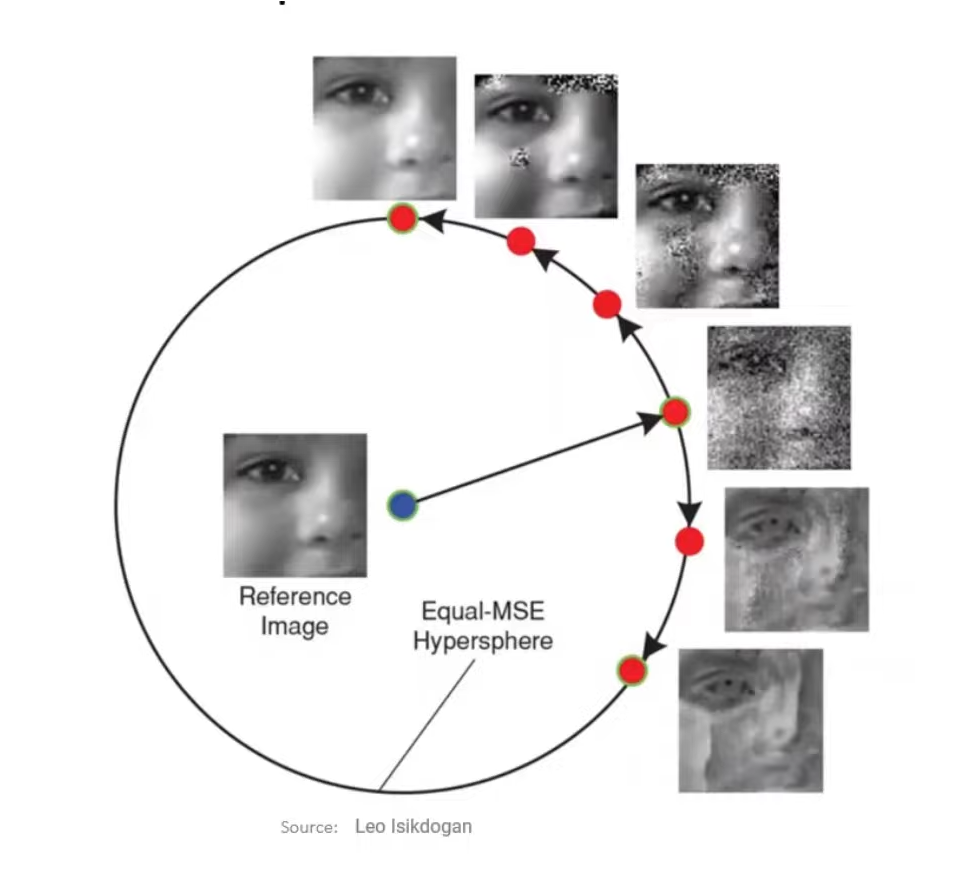

All these images have an equal MSE, but obviously the first one is the best, this information is provided only if we also consider the Content Loss.



## Content Loss / VGG Loss
This loss function evaluates the image based on it's perceptual quality.

### How will we calculate the perceptual quality of an image?
To do this, we compare the high level features of the generated image and the ground truth image, i.e. we compare the feature map of the two images, and then compare the two feature maps, and minimise this distance!

So instead of taking, the MSE pixel by pixel, we take the MSE between the detected features

How do we get this feature map? Take any famous pre-trained model for feature detection and extract the map after a few layers

### SRGAN can upscale by upto 4x!

## Architecture of SRGAN

### Dataset
We need pairs of High Resolution and Low resolution image.

We can do this by downscaling the HighRes Images, say by blurring and adding noise.

### Generator
Generator will take in low resolution image, and produce an image which is upscaled by 4x.

### Discriminator
Discriminator will take the output and penalize the generator if it can detect the image generated is of low quality. It is essentially a classification model to classify it is high RS or low RS.

Essentially, the discriminator tries to differentiate between the generated image of the Generator and the actual High resolution image that we know of. If it finds it different, it will penalise the Generator.

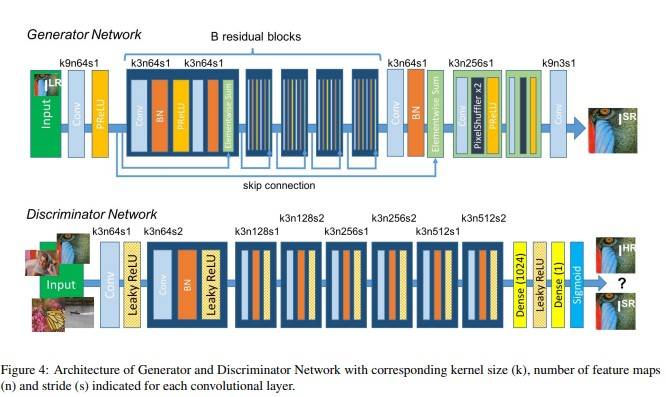

Activation Function: Parametric ReLU

Total 16 Residual Blocks.

PixelShuffler is mainly responsible for transformation to high RS

### PixelShuffler:

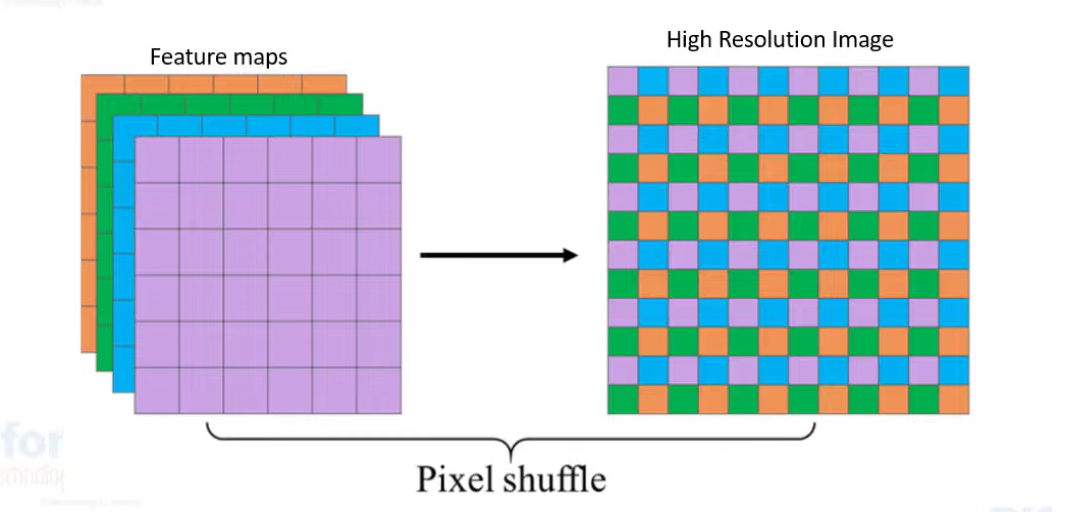

## Loss Function (detailed)

Total loss that is used to update the generator consist of:
1) Adversarial Loss / Discriminator Loss: The output of the generator is taken to the Discriminator, and if the discriminator can identify it as being of low resolution, it will update the Generator
2) Content Loss: The output image of the generator and the low resolution image, is passed through a CNN, and we extract the feature map some layers deep in the network, then we find the MSE between the two feature maps, this helps us detect if there's any feature loss in the generated image.

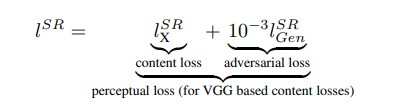

Content loss:
Different from calculating MSE Loss that produces smotthened effect and ignores the high frequency features like texture ,the authors develop a loss function that not just relies on pixel wise loss but defines the VGG loss as the euclidean distance between the feature representations.

Adversarial Loss:
The adversarial loss forces the generator to generate highly realistic images that can help fooling the discriminator.